In [24]:
import re
import os
import random
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from urllib.parse import urlparse
from sklearn import preprocessing
import tldextract
%matplotlib inline
import random
import gc
import xgboost as xgb
from sklearn import svm
from tensorflow import keras
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SpatialDropout1D
from sklearn import metrics
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau

In [4]:
df=pd.read_csv("/Users/abhinavshinow/Documents/GitHub/Mal_URL/Data/XSS_dataset.csv")

In [7]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [6]:
df.head()

,Sentence,Label
0,"<li><a href=""/wiki/File:Socrates.png"" class=""i...",0
1,"<tt onmouseover=""alert(1)"">test</tt>",1
2,"\t </span> <span class=""reference-text"">Steeri...",0
3,"\t </span> <span class=""reference-text""><cite ...",0
4,"\t </span>. <a href=""/wiki/Digital_object_iden...",0


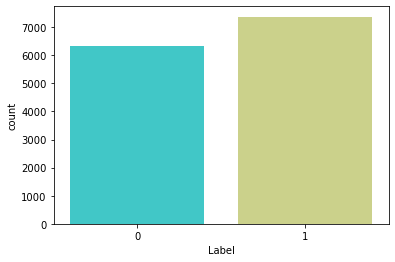

In [8]:
sns.countplot(x='Label',data=df, palette='rainbow')
plt.show()

In [9]:
MAX_WORDS = 100
MAX_LEN = 100
BATCH_SIZE=64
EPOCHS=100

In [ ]:
##!!!!!! url features

#Number of Characters

#Script tags
def tags(s):
    tags={'com':1,'edu':2,'org':3,'net':4,'onion':5,'in':6}
    #s=tldextract.extract(s).suffix
    if s in tags.keys():
        return tags[s]
    else:
        return 0

#Special characters detection
def spec_char(s):
    return sum((not(i.isalpha()) and not(i.isnumeric())) for i in s)

#cookie request


#Check for redirection


#keyword check


#harmfull methods or keyword check


 

In [10]:
#Converting the text to ascii
def convert_to_ascii(sentence):
    sentence_ascii=[]

    for i in sentence:
        
        
        """Some characters have values very big e.d 8221 adn some are chinese letters
        I am removing letters having values greater than 8222 and for rest greater 
        than 128 and smaller than 8222 assigning them values so they can easily be normalized"""
       
        if(ord(i)<8222):      # ” has ASCII of 8221
            
            if(ord(i)==8217): # ’  :  8217
                sentence_ascii.append(134)
            
            
            if(ord(i)==8221): # ”  :  8221
                sentence_ascii.append(129)
                
            if(ord(i)==8220): # “  :  8220
                sentence_ascii.append(130)
                
                
            if(ord(i)==8216): # ‘  :  8216
                sentence_ascii.append(131)
                
            if(ord(i)==8217): # ’  :  8217
                sentence_ascii.append(132)
            
            if(ord(i)==8211): # –  :  8211
                sentence_ascii.append(133)
                
                
            """
            If values less than 128 store them else discard them
            """
            if (ord(i)<=128):
                    sentence_ascii.append(ord(i))
    
            else:
                    pass
            

    zer=np.zeros((10000))

    for i in range(len(sentence_ascii)):
        zer[i]=sentence_ascii[i]

    zer.shape=(100, 100)


#     plt.plot(image)
#     plt.show()
    return zer

In [ ]:
# model=LogisticRegression(solver='lbfgs',max_iter=1000)
# model.fit(x_train,y_train)

In [ ]:
# y=[d[1] for d in data]
# url=[d[0] for d in data]
# vectorised_url=TfidfVectorizer(tokenizer=getTokens)
# x=vectorised_url.fit_transform(url)

In [17]:
sentences = df["Sentence"].values
y = df["Label"]

In [18]:
arr=np.zeros((len(sentences),100,100))

for i in range(len(sentences)):
    
    image=convert_to_ascii(sentences[i])

    # x=np.asarray(image,dtype='float')
    # image =  cv2.resize(x, dsize=(100,100), interpolation=cv2.INTER_CUBIC)
    # image/=128

    
#     if i==1:
#         plt.plot(image)
#         plt.show()    
    arr[i]=image

In [19]:
arr.shape

(13686, 100, 100)

In [21]:
x = arr.reshape(arr.shape[0], 100, 100, 1)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,shuffle='True',stratify=y)

In [23]:
model=tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(64,(3,3), activation=tf.nn.relu, input_shape=(100,100,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(256,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2021-12-04 08:28:07.142770: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-04 08:28:07.144150: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [37]:
es = EarlyStopping(monitor='val_loss', 
        mode='min', 
        patience=5,
        restore_best_weights=True, 
        verbose=1)
mc = ModelCheckpoint('best_model.h5',verbose=1,save_best_only=True, save_weights_only = True)
reduce_lr=ReduceLROnPlateau( monitor="val_loss",factor=0.7,patience=5, verbose=1)
callbacks=[es,mc,reduce_lr]

TypeError: __init__() got an unexpected keyword argument 'factor'

In [35]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 25600)             0

In [40]:
history=model.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,validation_data=(x_test, y_test),callbacks=[es,mc,reduce_lr])

Epoch 1/100
172/172 [==============================] - 34s 198ms/step - loss: 0.0220 - accuracy: 0.9923 - val_loss: 0.0855 - val_accuracy: 0.9795

Epoch 00001: val_loss did not improve from 0.04052
Epoch 2/100
172/172 [==============================] - 33s 192ms/step - loss: 0.0169 - accuracy: 0.9947 - val_loss: 0.0288 - val_accuracy: 0.9931

Epoch 00002: val_loss improved from 0.04052 to 0.02881, saving model to best_model.h5
Epoch 3/100
172/172 [==============================] - 33s 194ms/step - loss: 0.0130 - accuracy: 0.9951 - val_loss: 0.0257 - val_accuracy: 0.9934

Epoch 00003: val_loss improved from 0.02881 to 0.02569, saving model to best_model.h5
Epoch 4/100
172/172 [==============================] - 33s 189ms/step - loss: 0.0089 - accuracy: 0.9970 - val_loss: 0.0488 - val_accuracy: 0.9905

Epoch 00004: val_loss did not improve from 0.02569
Epoch 5/100
172/172 [==============================] - 33s 190ms/step - loss: 0.0201 - accuracy: 0.9950 - val_loss: 0.0395 - val_accuracy:

In [41]:
pred=model.predict(x_test)

2021-12-04 09:02:52.126745: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [42]:
#Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(y_test, pred, labels=[0,1])
plot_confusion_matrix(cm,classes=['benign','malicious'])

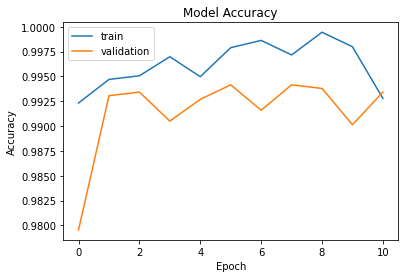

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()